### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 8
### Due: Friday, Oct 27 at 11:59 pm CT

## Problem 1

This week's problem is worth 40 points. This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw8_data.npy`, which is a (3 x 20) numpy array. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in the lecture. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e., just the likelihood x prior) on a grid of the linear coefficient (i.e., the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

# 1 import data
data = np.load('hw8_data.npy')
x, y, sigma_y = data

In [2]:
#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

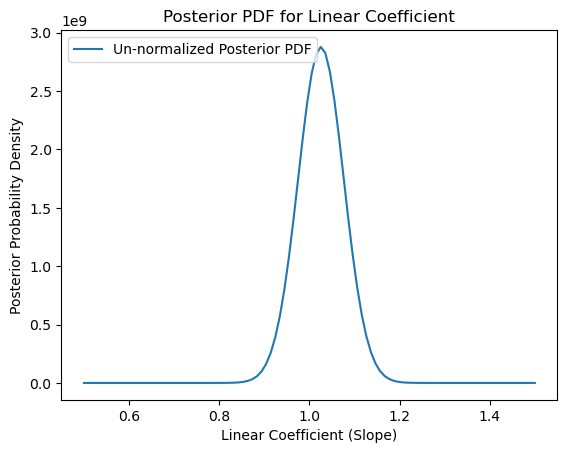

In [3]:
# 2. compute un-normalized posterior
# Fix the y-intercept
y_intercept_fixed = -0.23

# Define the linear model with fixed y-intercept
def linear_model(theta, x):
    return y_intercept_fixed + theta * x

# compute the data log-likelihood given the linear model
def logL(theta, data, model=linear_model):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

# Define the prior function (uniform between 0.5 and 1.5)
def prior(theta):
    if 0.5 <= theta <= 1.5:
        return 1.0
    else:
        return 0.0

# Define the grid of linear coefficients- grid of 100
theta_grid = np.linspace(0.5, 1.5, 100)

# compute likelihood
log_likelihood = [logL(theta, data) for theta in theta_grid]
likelihood = np.exp(log_likelihood)

# Compute prior
lin_prior = [prior(theta) for theta in theta_grid]

# Compute the un-normalized posterior PDF
posterior_unnormalized = likelihood * lin_prior

# Plot the posterior PDF
plt.plot(theta_grid, posterior_unnormalized, label='Un-normalized Posterior PDF')
plt.xlabel('Linear Coefficient (Slope)')
plt.ylabel('Posterior Probability Density')
plt.title('Posterior PDF for Linear Coefficient')
plt.legend()
plt.show()

3) Using your 1D gridded likelihood x prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this 1D posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model parameter dimension.

5) Using your 2D gridded likelihood x prior, compute the Bayesian evidence of the quadratic model. 

In [4]:
# 3. Using your 1D gridded likelihood x prior, compute the Bayesian evidence of this linear model

evidence = np.trapz(likelihood * lin_prior, theta_grid)
print("The Bayesian evidence is", evidence)

The Bayesian evidence is 365684733.16065943


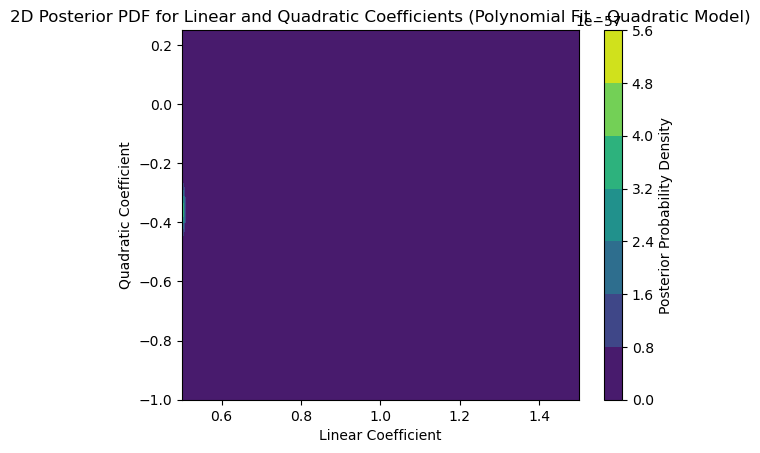

In [9]:
# 4. Compute joint 2D posterior pdf (not normalized) of lin and quad coefficients of a quad model.
# Give the linear coefficient a uniform prior between 0.5 and 1.5. 
# Give the quad coefficient a uniform prior between -1 and 0.25.
# Plot this 1D posterior
# Grid size of 100 in each model param dimension

# Define the prior function (uniform between 0.5 and 1.5)
def prior_quad(theta):
    if -1 <= theta <= 0.25:
        return 1.0
    else:
        return 0.0
# Define the grid of quadratic coefficients - grid of 100
quadratic_grid = np.linspace(-1, 0.25, 100)

quad_prior = [prior_quad(theta) for theta in quadratic_grid]

# Compute the un-normalized posterior PDF for quadratic model
posterior_unnormalized_quad = np.zeros((len(theta_grid), len(quadratic_grid)))

for i, linear_coeff in enumerate(theta_grid):
    for j, quadratic_coeff in enumerate(quadratic_grid):
        theta = np.array([linear_coeff, quadratic_coeff])
        log_likelihood = logL(theta, data, model=polynomial_fit)
        prior_value = prior(theta[0]) * prior_quad(theta[1])
        posterior_unnormalized_quad[i, j] = np.exp(log_likelihood) * prior_value

# Plot the 2D posterior PDF for quadratic model
plt.contourf(theta_grid, quadratic_grid, posterior_unnormalized_quad.T, cmap='viridis')
plt.xlabel('Linear Coefficient')
plt.ylabel('Quadratic Coefficient')
plt.title('2D Posterior PDF for Linear and Quadratic Coefficients (Polynomial Fit - Quadratic Model)')
plt.colorbar(label='Posterior Probability Density')
plt.show()

In [7]:
# 5. Using 2D gridded likelihood x prior, compute the Bayesian evidence of the quad model
evidence_quad = np.trapz(np.trapz(np.exp([[logL([linear_coeff, quadratic_coeff], data, model=polynomial_fit) for quadratic_coeff in quadratic_grid] for linear_coeff in theta_grid]) * np.outer(lin_prior, quad_prior), quadratic_grid), theta_grid)
print("The Bayesian evidence for the quadratic model is", evidence_quad)


The Bayesian evidence for the quadratic model is 3.220200540050276e-60
